# **Word Graph**

## Pendahuluan

Proyek ini merupakan tugas Ujian Akhir Semester (UAS) mata kuliah Pengolahan dan Pencarian Web (PPW). Tujuan dari proyek ini adalah mengekstraksi kata-kata penting dari sebuah dokumen jurnal ilmiah menggunakan tokenisasi dua kata (bigram), kemudian menganalisis keterhubungan kata tersebut menggunakan pendekatan graph dan beberapa metode centrality.

Dataset yang digunakan berupa dokumen jurnal dalam format PDF. Proses dilakukan mulai dari ekstraksi teks, preprocessing, pembentukan bigram, pemilihan 20 kata penting, hingga analisis centrality.

## Dataset

Dataset yang digunakan adalah satu dokumen jurnal ilmiah (PDF) yang berisi artikel tentang kesehatan. Teks jurnal diekstraksi menggunakan pustaka PyMuPDF sehingga dapat diproses lebih lanjut dalam bentuk teks.

## Installasi pymupdf

In [1]:
pip install --upgrade pymupdf

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/18.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/18.4 MB 4.6 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/18.4 MB 3.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.6/18.4 MB 3.1 MB/s eta 0:00:06
   ----- ---------------------------------- 2.4/18.4 MB 3.2 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/18.4 MB 3.3 MB/s eta 0:00:05
   -------- ------------------------------- 3.9/18.4 MB 3.4 MB/s eta 0:00:05
   ---------- ----------------------------- 4.7/18.4 MB 3.4 MB/s eta 0:00:05
   ------------ --------------------------- 5.8/18.4 MB 3.6 MB/s eta 0:00:04
   -------------- ------------------------- 6.6/18.4 MB 3.7 MB/s eta 0:00:04
   --------------- ------------------------ 7.3/18.4 MB 3.6 MB/s eta 0:00:04
   ------------------ --------------------- 8.4/18.4 MB 3.7 MB/s eta 0:00:03
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Menghubungkan Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Membaca Paper dan Membuat file txt

In [ ]:
import pymupdf

doc = pymupdf.open("kanker_payudara.pdf") # open a document
out = open("kanker_payudara.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

## Installasi nltk

In [3]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Installasi Library nltk

In [4]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to C:\Users\Raihan
[nltk_data]     Fadillah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Raihan
[nltk_data]     Fadillah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## Ekstraksi Teks dari PDF

In [13]:
import fitz # PyMuPDF

pdf_path = "kanker_payudara.pdf"
doc = fitz.open(pdf_path)

full_text = ""
for page in doc:
    full_text += page.get_text()

full_text[:500]

'Diterima Redaksi : 24-10-2019 | Selesai Revisi : 26-11-2019 | Diterbitkan Online : 10-12-2019 \n458 \n \n \nTerakreditasi SINTA Peringkat 2 \nSurat Keputusan Dirjen Penguatan Riset dan Pengembangan Ristek Dikti No. 10/E/KPT/2019 \nmasa berlaku mulai Vol. 1 No. 1 tahun 2017 s.d  Vol. 5 No. 3 tahun 2021 \n \nTerbit online pada laman web jurnal: http://jurnal.iaii.or.id \n \nJURNAL RESTI \n(Rekayasa Sistem dan Teknologi Informasi)  \n  Vol. 3 No. 3 (2019) 458 - 469 \n     ISSN Media Elektronik: 2580-0760 \n \nPen'

## Preprocessing Teks

In [14]:
import re
import string

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    return text

clean_text = preprocess_text(full_text)
clean_text[:500]

'diterima redaksi selesai revisi diterbitkan online terakreditasi sinta peringkat surat keputusan dirjen penguatan riset dan pengembangan ristek dikti no ekpt masa berlaku mulai vol no tahun sd vol no tahun terbit online pada laman web jurnal httpjurnaliaiiorid jurnal resti rekayasa sistem dan teknologi informasi vol no issn media elektronik pendekatan machine learning yang efisien untuk prediksi kanker payudara azminuddin i s azis irma surya kumala idris budy santoso yasin aril mustofa jurusan t'

## Tokenisasi Bigram dan TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(2,2),
    stop_words='english',
    max_features=100
    )

tfidf_matrix = vectorizer.fit_transform([clean_text])
feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()[0]

# Ekstraksi 20 Kata Penting

In [16]:
import pandas as pd

tfidf_df = pd.DataFrame({
    'Bigram': feature_names,
    'Score': scores
    })

top_20 = tfidf_df.sort_values(by='Score', ascending=False).head(20)
top_20

,Bigram,Score
9,breast cancer,0.375735
90,vol pp,0.254736
97,yang terbaik,0.229262
18,dengan akurasi,0.184683
42,machine learning,0.165578
21,digunakan untuk,0.159210
62,pada dataset,0.152841
34,jurnal resti,0.152841
13,dan teknologi,0.146473
31,informasi vol,0.146473


## Pembangunan Graph Kata

Graph dibangun menggunakan NetworkX, di mana node merepresentasikan kata dan edge merepresentasikan hubungan antar kata dalam bigram.

In [17]:
import networkx as nx

G = nx.Graph()

for _, row in top_20.iterrows():
    w1, w2 = row['Bigram'].split()
    G.add_edge(w1, w2, weight=row['Score'])

## Analisis Centrality

In [20]:
pagerank = nx.pagerank(G)

degree = nx.degree_centrality(G)

betweenness = nx.betweenness_centrality(G)

closeness = nx.closeness_centrality(G)

## Hasil Analisis Centrality

In [22]:
centrality_df = pd.DataFrame({
    'PageRank': pagerank,
    'Degree Centrality': degree,
    'Betweenness Centrality': betweenness,
    'Closeness Centrality': closeness
    }).sort_values(by='PageRank', ascending=False)

centrality_df

,PageRank,Degree Centrality,Betweenness Centrality,Closeness Centrality
yang,0.061135,0.103448,0.012315,0.110345
vol,0.042341,0.068966,0.017241,0.076100
resti,0.038773,0.068966,0.017241,0.076100
metode,0.036395,0.068966,0.007389,0.091954
rekayasa,0.035809,0.068966,0.029557,0.091954
sistem,0.034541,0.068966,0.036946,0.105090
dan,0.033702,0.068966,0.039409,0.110345
digunakan,0.033333,0.034483,0.000000,0.034483
pada,0.033333,0.034483,0.000000,0.034483
untuk,0.033333,0.034483,0.000000,0.034483


## Visualisasi Graph Kata

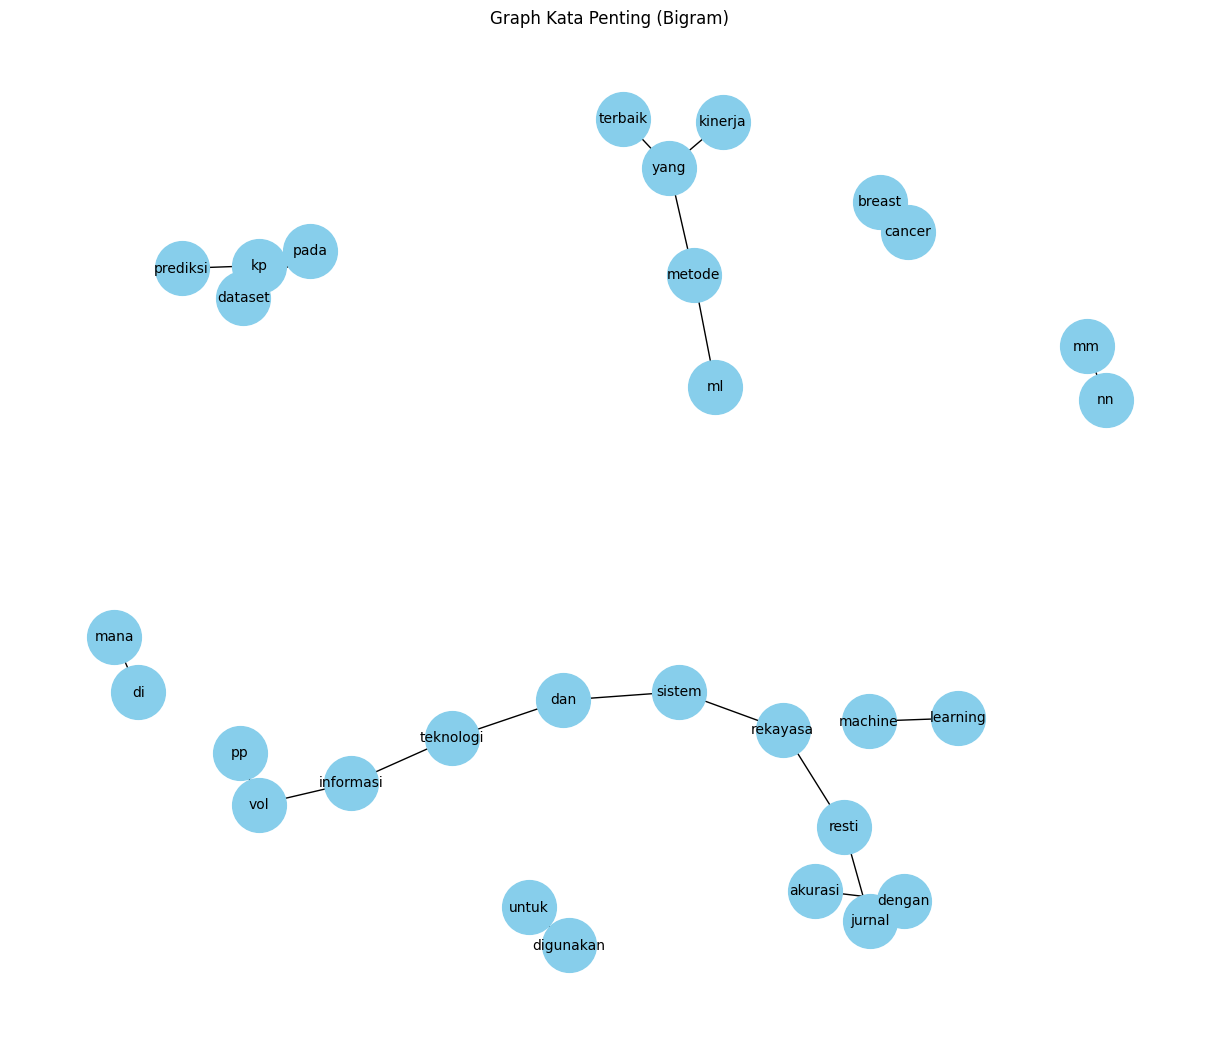

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos,
    with_labels=True,
    node_size=1500,
    node_color='skyblue',
    font_size=10)

plt.title("Graph Kata Penting (Bigram)")
plt.show()

## Interpretasi Hasil

Kata dengan nilai PageRank tertinggi menunjukkan kata yang paling berpengaruh dalam dokumen jurnal. Degree Centrality menggambarkan seberapa sering suatu kata terhubung dengan kata lain. Betweenness Centrality menunjukkan peran kata sebagai penghubung antar topik, sedangkan Closeness Centrality menunjukkan kedekatan suatu kata dengan kata lain dalam graph.

## Kesimpulan

Berdasarkan hasil eksperimen, dapat disimpulkan bahwa metode tokenisasi bigram dan analisis centrality mampu mengidentifikasi kata-kata penting dalam dokumen jurnal. Pendekatan berbasis graph memberikan gambaran keterhubungan antar konsep dalam dokumen.

Pengembangan selanjutnya dapat dilakukan dengan mengintegrasikan model berbasis Hugging Face untuk meningkatkan kualitas ekstraksi kata kunci dan melakukan deployment pada platform web statis.